In [1]:
import sys, os
import torch
import numpy as np
import utils
from torch.nn import Module, Parameter
import torch.optim as opt
from utils import preprocess
import torch.nn.functional as F

import torch.optim as opt
from torch import softmax, log_softmax, Tensor
from sklearn.cluster import KMeans
from scipy.sparse.linalg import svds


from sklearn.decomposition import PCA
from umap import UMAP

import pandas as pd 
import numpy as np 
import scipy.sparse as sp
import torch
import model
import newmodel
import coupleNMF as coupleNMF

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import importlib 

importlib.reload(newmodel)
importlib.reload(utils)
importlib.reload(coupleNMF)

# Simulated

In [42]:
# read in the data
dir = '../data/simulated/2b5c_ziqi1/'
counts_rna = pd.read_csv(os.path.join(dir, 'GxC1.txt'), sep = "\t", header = None).values.T
counts_atac = pd.read_csv(os.path.join(dir, 'RxC2.txt'), sep = "\t", header = None).values.T
A = pd.read_csv(os.path.join(dir, 'region2gene.txt'), sep = "\t", header = None).values.T

counts_rna = np.array(counts_rna)
counts_atac = np.array(counts_atac)
A = np.array(A)

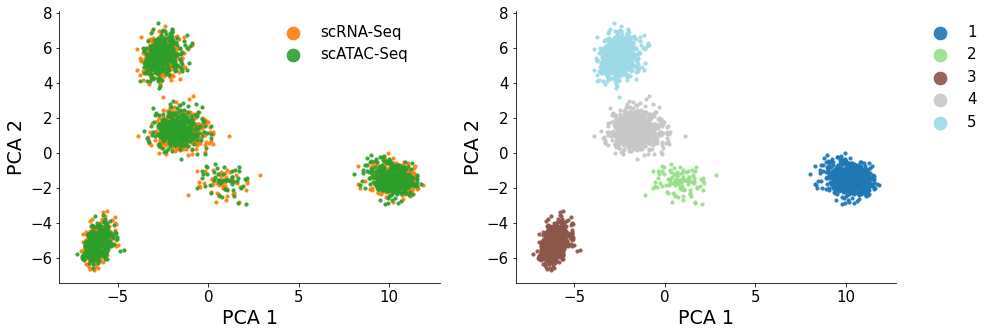

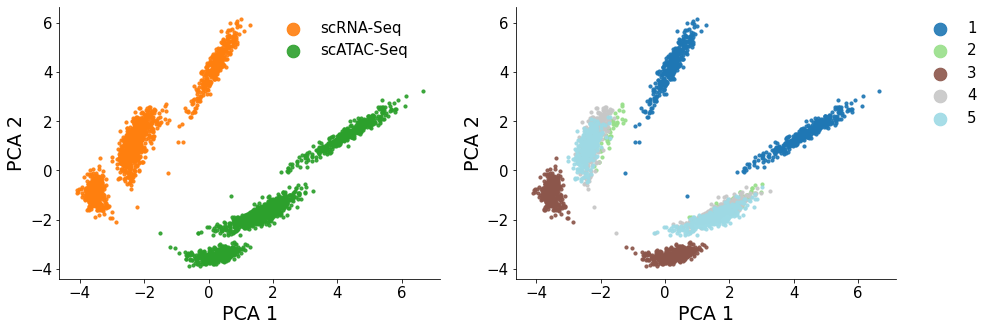

In [43]:
# visualization
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2)
R1 = pd.read_csv(os.path.join(dir, 'RxC1.txt'), sep = "\t", header = None).values.T
R2 = pd.read_csv(os.path.join(dir, 'RxC2.txt'), sep = "\t", header = None).values.T

R = np.concatenate((R1, R2), axis = 0)
R = utils.preprocess(R, mode = "quantile", modality = "ATAC")
R = R/np.max(R)
X = pca_op.fit_transform(R)

label_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), index_col=0, sep ="\t")["pop"].values.squeeze()
label_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), index_col=0, sep = "\t")["pop"].values.squeeze()

utils.plot_latent(X[:R1.shape[0],:], X[R1.shape[0]:, :], label_rna, label_atac, mode= "hybrid", save = None, figsize = (15,5), axis_label = "PCA")


G1 = pd.read_csv(os.path.join(dir, 'GxC1.txt'), sep = "\t", header = None).values.T
G2 = pd.read_csv(os.path.join(dir, 'GxC2.txt'), sep = "\t", header = None).values.T

G = np.concatenate((G1, G2), axis = 0)
G = utils.preprocess(G, mode = "quantile", modality = "RNA")
G = G/np.max(G)
X = pca_op.fit_transform(G)

label_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), index_col=0, sep ="\t")["pop"].values.squeeze()
label_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), index_col=0, sep = "\t")["pop"].values.squeeze()

utils.plot_latent(X[:G1.shape[0],:], X[G1.shape[0]:, :], label_rna, label_atac, mode= "hybrid", save = None, figsize = (15,5), axis_label = "PCA")


In [5]:
cnmf = coupleNMF.coupleNMF({"rna":[counts_rna.T], "atac": [counts_atac.T], "gact": [A]}, 
                           N = 5, lambda1 = None, lambda2 = None)

E_symbol = np.array([str(x) for x in range(counts_rna.shape[0])])
P_symbol = np.array([str(x) for x in range(counts_atac.shape[0])])

H1, H2 = cnmf.train_func(E_symbol = E_symbol, P_symbol = P_symbol)

Initializing non-negative matrix factorization for gene expression data...


/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number 

/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number 

Initializing non-negative matrix factorization for chromatin accessibility data...


/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number 

Selecting differentially expressed genes...


/storage/home/hhive1/zzhang834/.conda/envs/myenv/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: invalid value encountered in double_scalars
  tstat = (value1 - value2 - diff) / std_diff
/storage/hive/project/cse-vuduc/zzhang834/CFRM/src/coupleNMF_symsim.py:106: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(p2)


Selecting differentially open peaks...


/storage/hive/project/cse-vuduc/zzhang834/CFRM/src/coupleNMF_symsim.py:124: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(p1)


Initializing hyperparameters lambda1, lambda2 and mu...
Starting coupleNMF...
1.4662678929895274 0.007066570435595838
Iterating coupleNMF...


/storage/hive/project/cse-vuduc/zzhang834/CFRM/src/coupleNMF_symsim.py:231: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(p2)
/storage/hive/project/cse-vuduc/zzhang834/CFRM/src/coupleNMF_symsim.py:246: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(p1)


1.4662678929895274 0.03533285217797919
Iterating coupleNMF...
1.4662678929895274 0.17666426088989595
Iterating coupleNMF...
1.4662678929895274 0.8833213044494799
Iterating coupleNMF...
1.4662678929895274 4.416606522247399
Iterating coupleNMF...
7.3313394649476376 0.007066570435595838
Iterating coupleNMF...
7.3313394649476376 0.03533285217797919
Iterating coupleNMF...
7.3313394649476376 0.17666426088989595
Iterating coupleNMF...
7.3313394649476376 0.8833213044494799
Iterating coupleNMF...
7.3313394649476376 4.416606522247399
Iterating coupleNMF...
36.65669732473818 0.007066570435595838
Iterating coupleNMF...
36.65669732473818 0.03533285217797919
Iterating coupleNMF...
36.65669732473818 0.17666426088989595
Iterating coupleNMF...
36.65669732473818 0.8833213044494799
Iterating coupleNMF...
36.65669732473818 4.416606522247399
Iterating coupleNMF...
183.28348662369092 0.007066570435595838
Iterating coupleNMF...
183.28348662369092 0.03533285217797919
Iterating coupleNMF...
183.28348662369092 

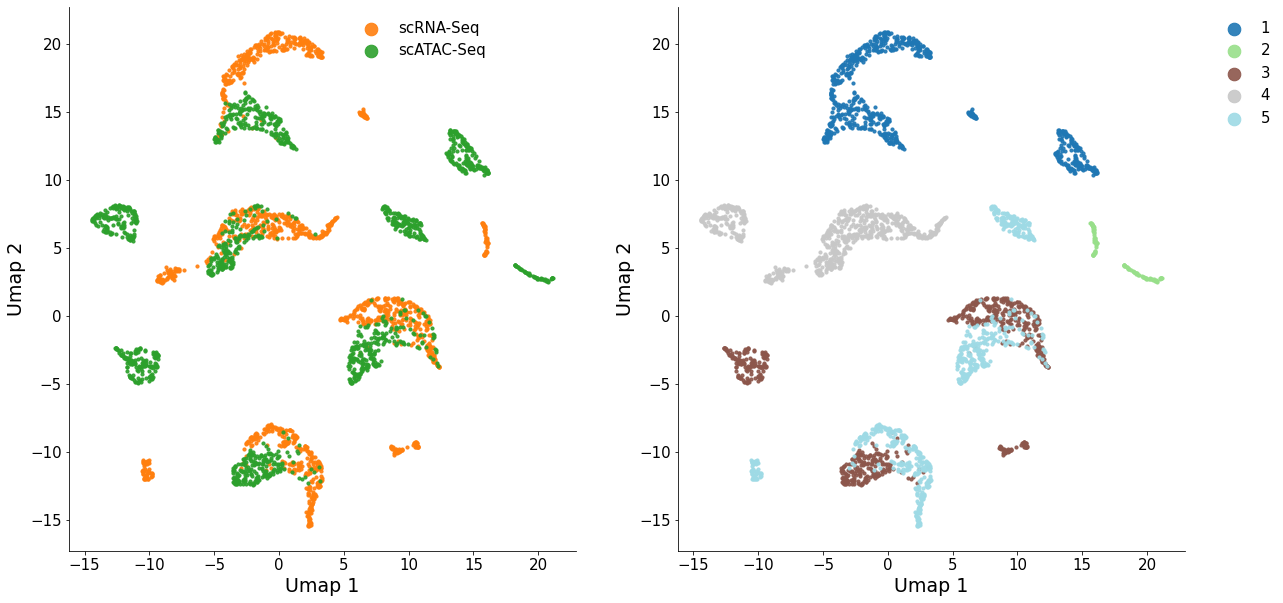

In [11]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = H2.T
z_atac = H1.T

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), index_col=0, sep ="\t")["pop"].values.squeeze()
label_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), index_col=0, sep = "\t")["pop"].values.squeeze()

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "hybrid", save = None, axis_label = "Umap")

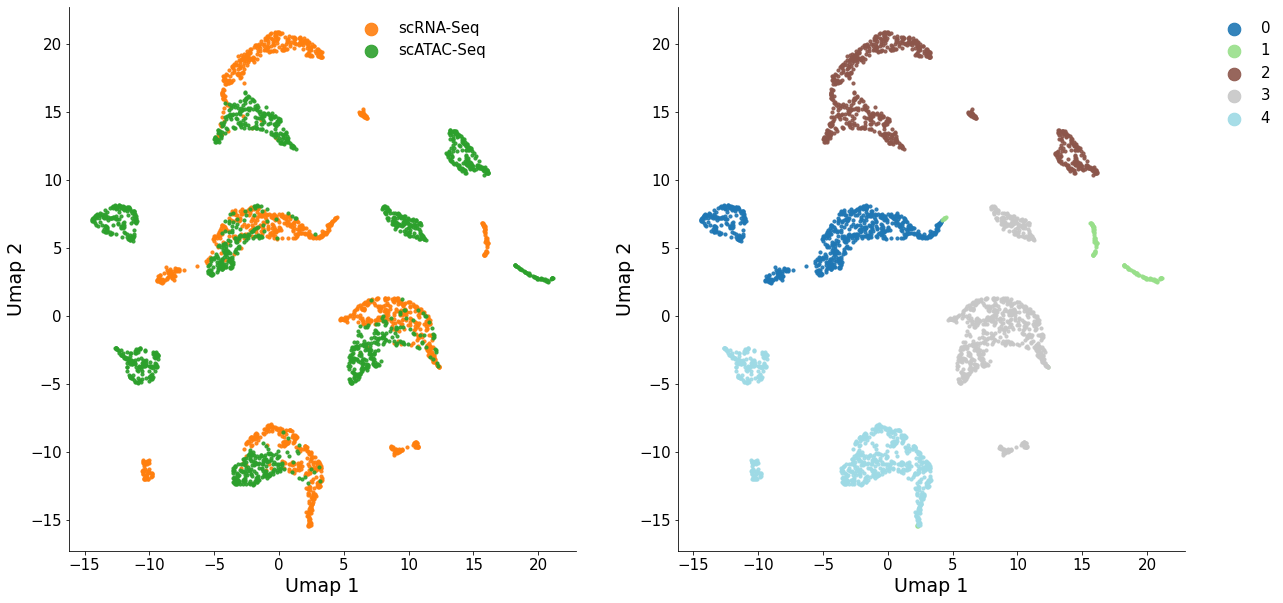

In [12]:
utils.plot_latent(z_rna, z_atac, max_rna, max_atac, mode= "hybrid", save = None, axis_label = "Umap")

# Training

In [71]:
counts = {"rna":[counts_rna], "atac": [counts_atac], "gact": [A]}
model1 = newmodel.cfrm_new(counts, N = 5, batch_size = 0.5, interval = 1000, lr = 1e-3, alpha = [1000, 1000, 100, 100.0],seed = 0, init = None).to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 10000)


Initial Loss is -25.40408
Epoch 1000, Validating Loss: -140.8225
	 loss 1: 21.23619
	 loss 2: 36.42086
	 loss 3: -99.99925
	 loss 4: -98.48029
Epoch 2000, Validating Loss: -141.5445
	 loss 1: 21.09329
	 loss 2: 36.14195
	 loss 3: -99.99948
	 loss 4: -98.78029
Epoch 3000, Validating Loss: -141.9213
	 loss 1: 21.02986
	 loss 2: 36.05339
	 loss 3: -99.99973
	 loss 4: -99.00485
Epoch 4000, Validating Loss: -142.1486
	 loss 1: 20.99635
	 loss 2: 35.99200
	 loss 3: -99.99986
	 loss 4: -99.13710
Epoch 5000, Validating Loss: -142.2792
	 loss 1: 20.98204
	 loss 2: 35.96363
	 loss 3: -99.99979
	 loss 4: -99.22513
Epoch 6000, Validating Loss: -142.3686
	 loss 1: 20.97296
	 loss 2: 35.94227
	 loss 3: -99.99986
	 loss 4: -99.28392
Epoch 7000, Validating Loss: -142.4305
	 loss 1: 20.96742
	 loss 2: 35.92916
	 loss 3: -99.99988
	 loss 4: -99.32724
Epoch 8000, Validating Loss: -142.4734
	 loss 1: 20.96407
	 loss 2: 35.91852
	 loss 3: -99.99992
	 loss 4: -99.35607
Epoch 9000, Validating Loss: -142.5112

In [54]:
# they are close, cosine similarity achieve the same as mse
(model1.softmax(model1.C_g) - model1.A @ model1.softmax(model1.C_r)).pow(2).mean()

tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>)

In [38]:
u,s,v = np.linalg.svd(counts_rna, full_matrices = False)

np.cumsum( (s/np.sum(s)) )

array([0.51102233, 0.62502173, 0.66704119, 0.68784141, 0.69839031,
       0.7071381 , 0.71534413, 0.72278886, 0.72892869, 0.73383075,
       0.73825035, 0.74239944, 0.74641871, 0.74980449, 0.75311352,
       0.75621848, 0.75921276, 0.7620081 , 0.76472933, 0.76739012,
       0.76995054, 0.77237769, 0.77470994, 0.77701626, 0.77925803,
       0.78140032, 0.78348279, 0.78552273, 0.78742584, 0.78929212,
       0.791134  , 0.79292988, 0.79467201, 0.79638212, 0.7980732 ,
       0.79973844, 0.80138711, 0.8029711 , 0.80452259, 0.80602745,
       0.80752725, 0.80899378, 0.81044336, 0.81187006, 0.81328327,
       0.8146715 , 0.81603799, 0.81737977, 0.81870677, 0.8200221 ,
       0.82129844, 0.82256889, 0.82383176, 0.82509147, 0.82633976,
       0.8275583 , 0.82875631, 0.82994218, 0.83112337, 0.83229336,
       0.83343518, 0.8345653 , 0.83568342, 0.83679542, 0.83788331,
       0.83895374, 0.84000793, 0.84104623, 0.84207408, 0.84308983,
       0.84408942, 0.84508362, 0.84607558, 0.84706107, 0.84801

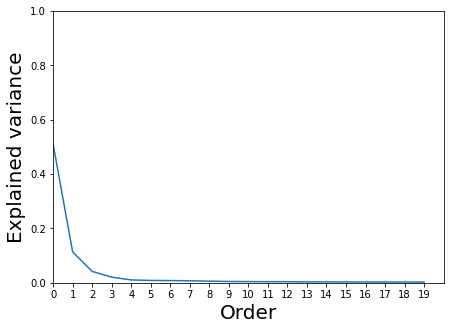

In [39]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot()
ax.plot((s/np.sum(s))[:20])
ax.set_ylim([0,1])
ax.set_xlim([0,20])
_ = ax.set_xticks(np.arange(20))
_ = ax.set_xlabel("Order", fontsize = 20)
_ = ax.set_ylabel("Explained variance", fontsize = 20)

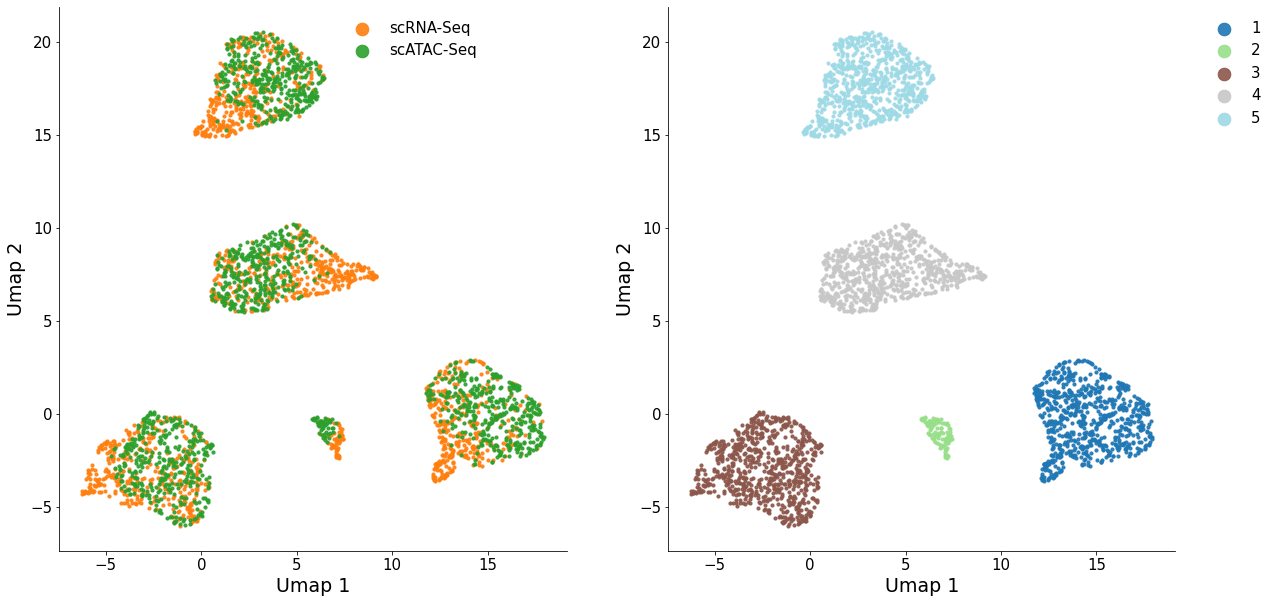

In [72]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach()).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), index_col=0, sep ="\t")["pop"].values.squeeze()
label_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), index_col=0, sep = "\t")["pop"].values.squeeze()

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "hybrid", save = None, axis_label = "Umap")

In [56]:
# kl divergence between uniform latent embeddings 
print(utils.kl_div(model1.softmax(model1.C_1)))
print(utils.kl_div(model1.softmax(model1.C_2)))

tensor(0.6534, device='cuda:0', grad_fn=<MedianBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<MedianBackward0>)


In [25]:
model_classic = model.classicCFRM(counts, N = 5, init = "svd")

0.05623119696974754
0.02053399570286274
0.03549829125404358
0.00019891005649697036


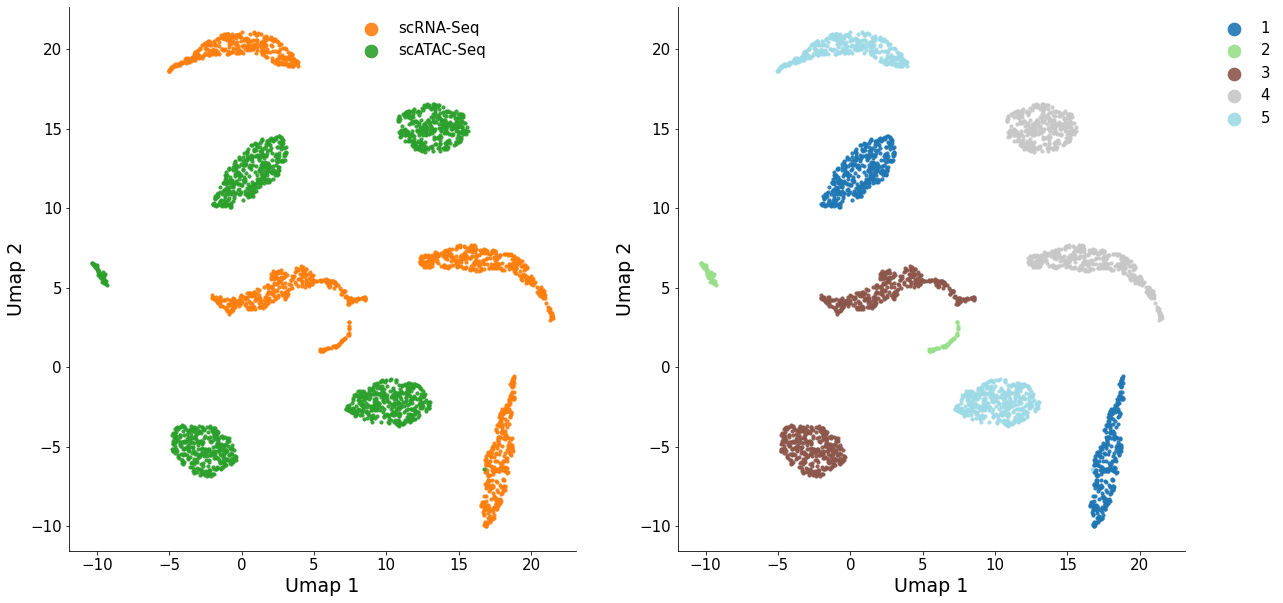

In [26]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model_classic.C_1.cpu().detach().numpy()
z_atac = model_classic.C_2.cpu().detach().numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), index_col=0, sep ="\t")["pop"].values.squeeze()
label_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), index_col=0, sep = "\t")["pop"].values.squeeze()

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "hybrid", save = None, axis_label = "Umap")

In [116]:
from scipy.sparse import csr_matrix, linalg
def svd_fast(X, n_pcs = 2):
    U, Sigma, Vh = linalg.svds(X, return_singular_vectors = "u", k = n_pcs, which = "LM")
    return U

z_rna = svd_fast(model_classic.G.detach().numpy())
z_atac = svd_fast(model_classic.R.detach().numpy())

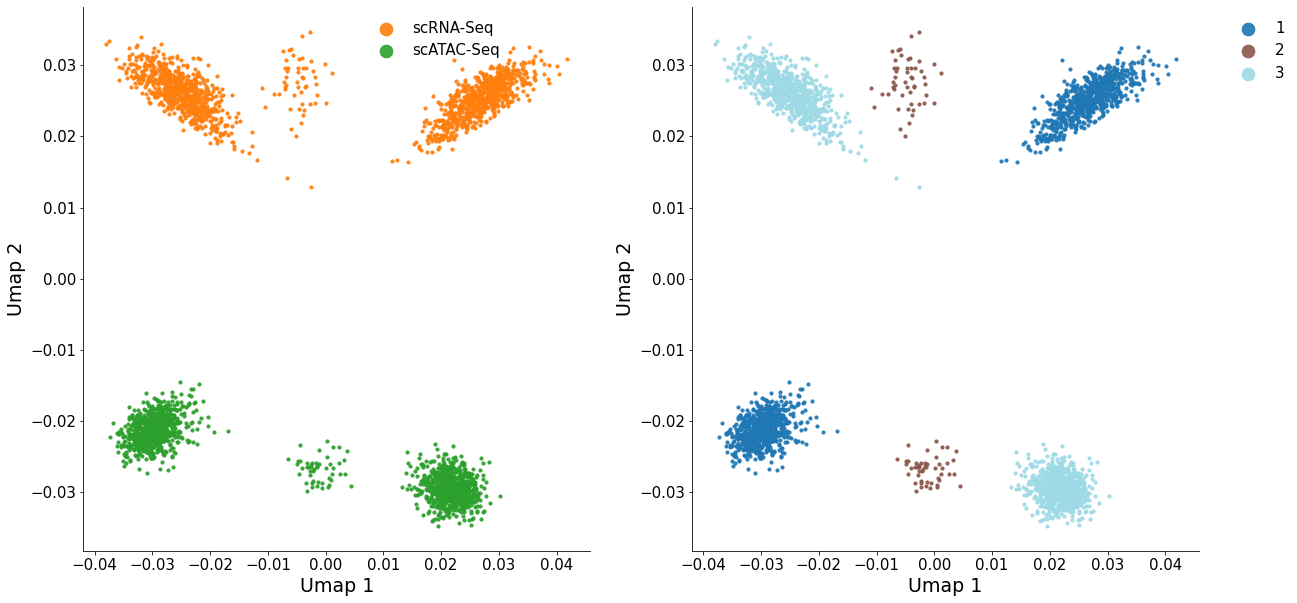

In [117]:
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "hybrid", save = None, axis_label = "Umap")

# Real

In [79]:
dir = '../data/real/Xichen/'
counts_rna = sp.load_npz(os.path.join(dir, 'GxC1.npz'))
counts_atac = sp.load_npz(os.path.join(dir, 'RxC2.npz')).astype(np.float32)
A = sp.load_npz(os.path.join(dir, 'GxR.npz'))
subsample = 1

counts_rna = np.array(counts_rna.todense().T)
counts_atac = np.array(counts_atac.todense().T)
counts_rna = counts_rna[::subsample,:]
counts_atac = counts_atac[::subsample,:]
A = np.array(A.todense())

In [80]:
counts_atac.shape

(3166, 20435)

In [82]:
# good init, nmf, if latent dim = 10, running time grows exponentially
counts = {"rna":[counts_rna], "atac": [counts_atac], "gact": [A]}

model1 = newmodel.cfrm_nmfinit(counts, N = 5, batch_size = 0.5, interval = 1000, lr = 1e-3, alpha = [1000, 1000, 100, 100.0], seed = 0).to(device)
C_12, C_22, A_g2, A_r2, C_g2, C_r2 = model1.train_func(T = 500, match = True)


iteration: 0, loss1: 0.020474471151828766, loss2: 0.10524486750364304
iteration: 100, loss1: 0.009107554331421852, loss2: 0.07519853115081787
iteration: 200, loss1: 0.009005816653370857, loss2: 0.07388545572757721
iteration: 300, loss1: 0.008985019288957119, loss2: 0.07356472313404083
iteration: 400, loss1: 0.00897512398660183, loss2: 0.07344165444374084


In [83]:
counts = {"rna":[counts_rna], "atac": [counts_atac], "gact": [A]}
model1 = newmodel.cfrm_new(counts, N = 5, batch_size = 0.5, interval = 1000, lr = 1e-3, alpha = [1000, 1000, 100, 100.0],seed = 0, init = [C_12, C_22, A_g2, A_r2, C_g2, C_r2]).to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 10000)


Initial Loss is -33.50822
Epoch 1000, Validating Loss: -117.1386
	 loss 1: 9.13648
	 loss 2: 73.42202
	 loss 3: -99.99992
	 loss 4: -99.69720
Epoch 2000, Validating Loss: -117.2898
	 loss 1: 9.18966
	 loss 2: 73.39622
	 loss 3: -99.99996
	 loss 4: -99.87571
Epoch 3000, Validating Loss: -117.2668
	 loss 1: 9.20702
	 loss 2: 73.41691
	 loss 3: -99.99995
	 loss 4: -99.89080
Epoch 4000, Validating Loss: -117.2788
	 loss 1: 9.19897
	 loss 2: 73.41776
	 loss 3: -99.99993
	 loss 4: -99.89557
Epoch 5000, Validating Loss: -117.3181
	 loss 1: 9.17366
	 loss 2: 73.39869
	 loss 3: -99.99985
	 loss 4: -99.89056
Epoch 6000, Validating Loss: -117.3787
	 loss 1: 9.13739
	 loss 2: 73.37235
	 loss 3: -99.99953
	 loss 4: -99.88892
Epoch 7000, Validating Loss: -117.4475
	 loss 1: 9.10002
	 loss 2: 73.34290
	 loss 3: -99.99928
	 loss 4: -99.89114
Epoch 8000, Validating Loss: -117.5021
	 loss 1: 9.07100
	 loss 2: 73.32392
	 loss 3: -99.99892
	 loss 4: -99.89806
Epoch 9000, Validating Loss: -117.5442
	 loss 

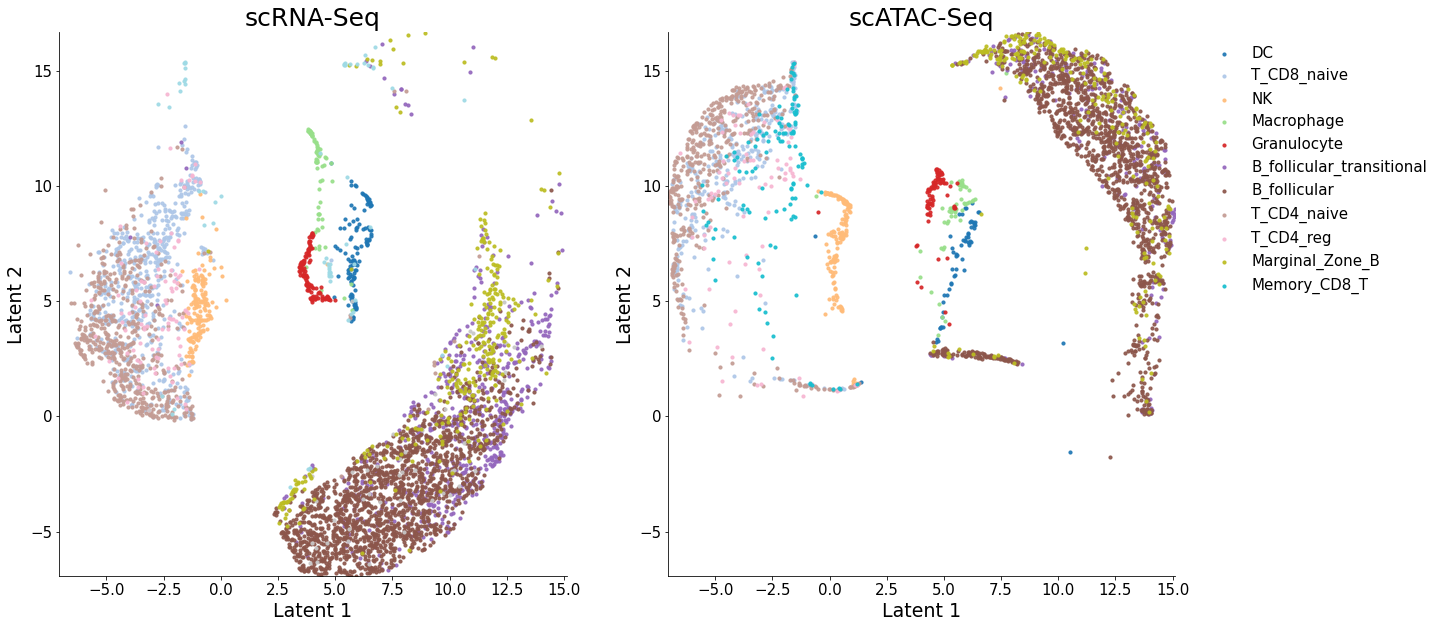

In [84]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach()).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join(dir, "meta_rna.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]
label_atac = pd.read_csv(os.path.join(dir, "meta_atac.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [90]:
counts = {"rna":[counts_rna], "atac": [counts_atac], "gact": [A]}

model1 = newmodel.cfrm_svdinit(counts, N = 5).to(device)
C_12, C_22, A_g2, A_r2, C_g2, C_r2 = model1.train_func(match = True)

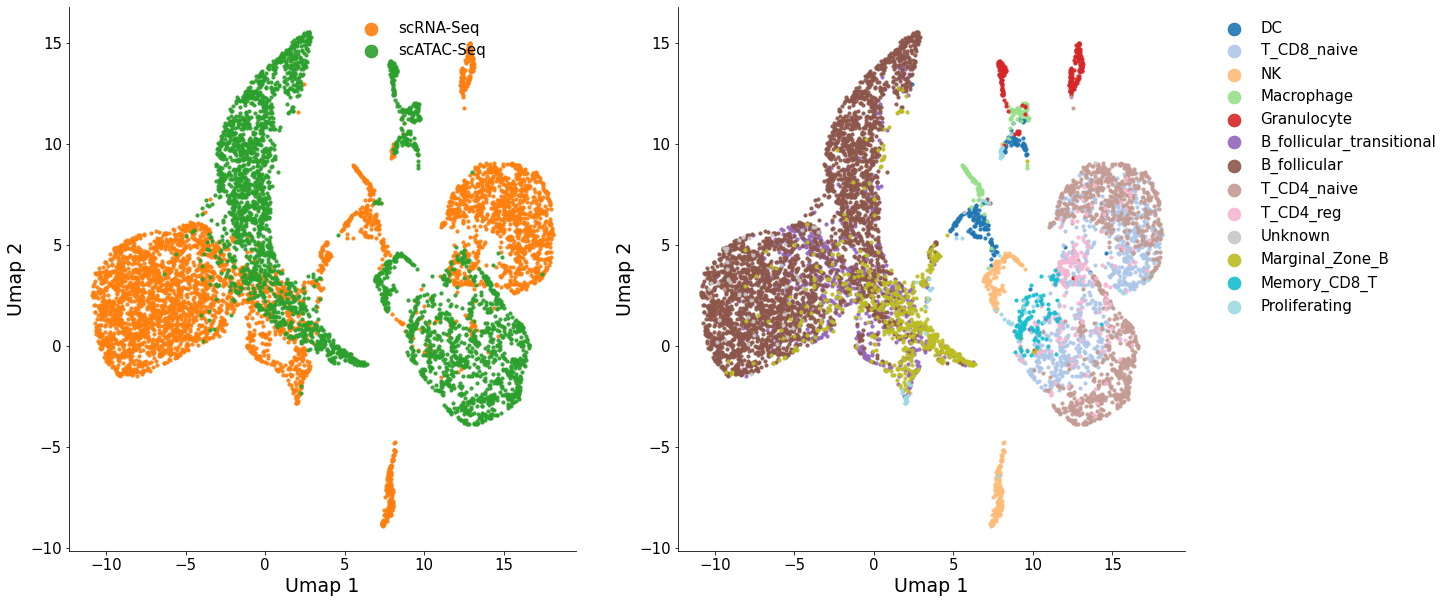

In [92]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = torch.softmax(C_12.cpu().detach(), dim = 1).numpy()
z_atac = torch.softmax(C_22.cpu().detach(), dim = 1).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join(dir, "meta_rna.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]
label_atac = pd.read_csv(os.path.join(dir, "meta_atac.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "hybrid", save = None, axis_label = "Umap")

In [93]:
counts = {"rna":[counts_rna], "atac": [counts_atac], "gact": [A]}
model1 = newmodel.cfrm_new(counts, N = 5, batch_size = 0.5, interval = 1000, lr = 1e-3, alpha = [1000, 1000, 100, 100.0],seed = 0, init = [C_12, C_22, A_g2, A_r2, C_g2, C_r2]).to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 10000)


Initial Loss is 17103200.00000
Epoch 1000, Validating Loss: -110.4357
	 loss 1: 9.45533
	 loss 2: 78.45612
	 loss 3: -98.39592
	 loss 4: -99.95126
Epoch 2000, Validating Loss: -111.4849
	 loss 1: 9.26821
	 loss 2: 77.57545
	 loss 3: -98.39896
	 loss 4: -99.92963
Epoch 3000, Validating Loss: -111.1017
	 loss 1: 9.10687
	 loss 2: 78.13145
	 loss 3: -98.41360
	 loss 4: -99.92638
Epoch 4000, Validating Loss: -109.2441
	 loss 1: 9.05018
	 loss 2: 80.10745
	 loss 3: -98.47471
	 loss 4: -99.92706
Epoch 5000, Validating Loss: -109.6357
	 loss 1: 9.04360
	 loss 2: 79.89434
	 loss 3: -98.63768
	 loss 4: -99.93597
Epoch 6000, Validating Loss: -108.7484
	 loss 1: 9.03782
	 loss 2: 80.99602
	 loss 3: -98.84261
	 loss 4: -99.93965
Epoch 7000, Validating Loss: -109.4568
	 loss 1: 9.04088
	 loss 2: 80.47039
	 loss 3: -99.02602
	 loss 4: -99.94204
Epoch 8000, Validating Loss: -110.4262
	 loss 1: 9.04295
	 loss 2: 79.66022
	 loss 3: -99.18672
	 loss 4: -99.94266
Epoch 9000, Validating Loss: -110.2444
	 

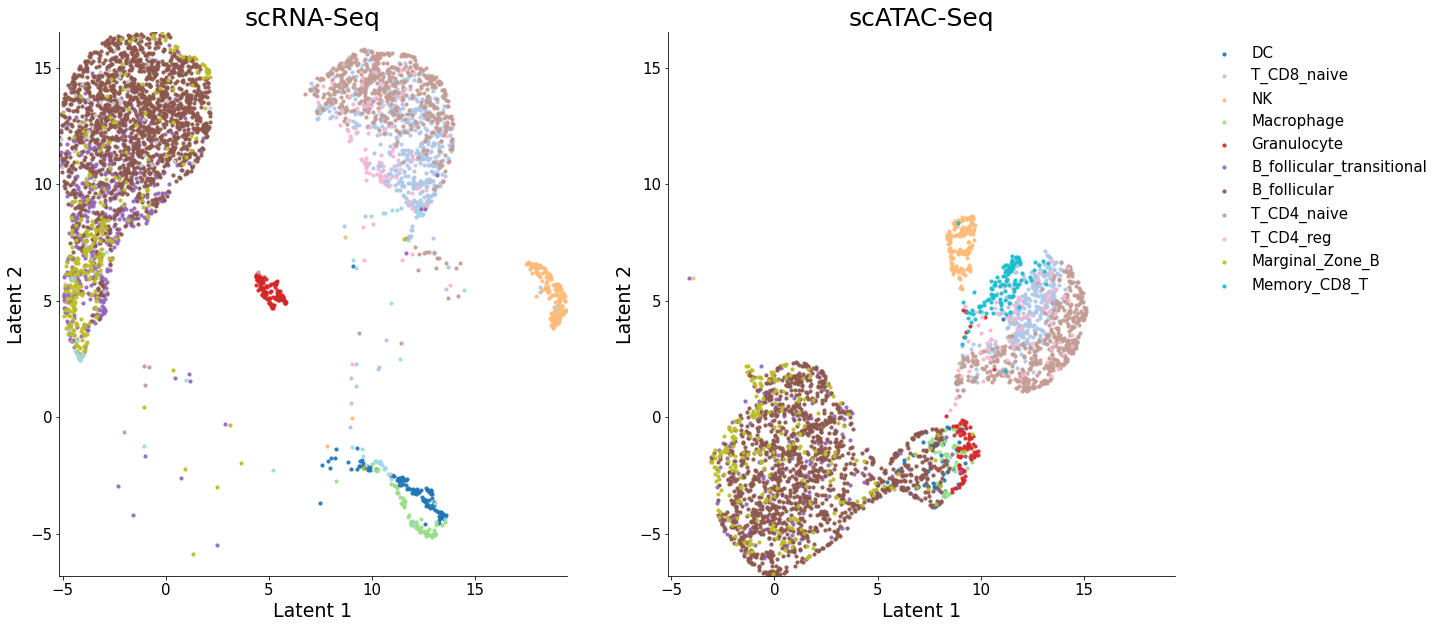

In [94]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach()).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join(dir, "meta_rna.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]
label_atac = pd.read_csv(os.path.join(dir, "meta_atac.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [86]:
counts = {"rna":[counts_rna], "atac": [counts_atac], "gact": [A]}
model1 = newmodel.cfrm_new(counts, N = 5, batch_size = 0.5, interval = 1000, lr = 1e-3, alpha = [1000, 1000, 100, 100],seed = 0, init = None).to(device)
with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 10000)


Initial Loss is 15.20808
Epoch 1000, Validating Loss: -115.4156
	 loss 1: 9.50017
	 loss 2: 75.05058
	 loss 3: -99.99974
	 loss 4: -99.96665
Epoch 2000, Validating Loss: -116.6214
	 loss 1: 9.33192
	 loss 2: 74.00191
	 loss 3: -99.99996
	 loss 4: -99.95523
Epoch 3000, Validating Loss: -117.0189
	 loss 1: 9.26769
	 loss 2: 73.64401
	 loss 3: -99.99997
	 loss 4: -99.93068
Epoch 4000, Validating Loss: -117.1773
	 loss 1: 9.22525
	 loss 2: 73.50840
	 loss 3: -99.99995
	 loss 4: -99.91100
Epoch 5000, Validating Loss: -117.2319
	 loss 1: 9.19550
	 loss 2: 73.47193
	 loss 3: -99.99988
	 loss 4: -99.89941
Epoch 6000, Validating Loss: -117.2554
	 loss 1: 9.17712
	 loss 2: 73.47013
	 loss 3: -99.99985
	 loss 4: -99.90281
Epoch 7000, Validating Loss: -117.2678
	 loss 1: 9.16823
	 loss 2: 73.47726
	 loss 3: -99.99988
	 loss 4: -99.91341
Epoch 8000, Validating Loss: -117.2743
	 loss 1: 9.16235
	 loss 2: 73.48775
	 loss 3: -99.99988
	 loss 4: -99.92448
Epoch 9000, Validating Loss: -117.2771
	 loss 1

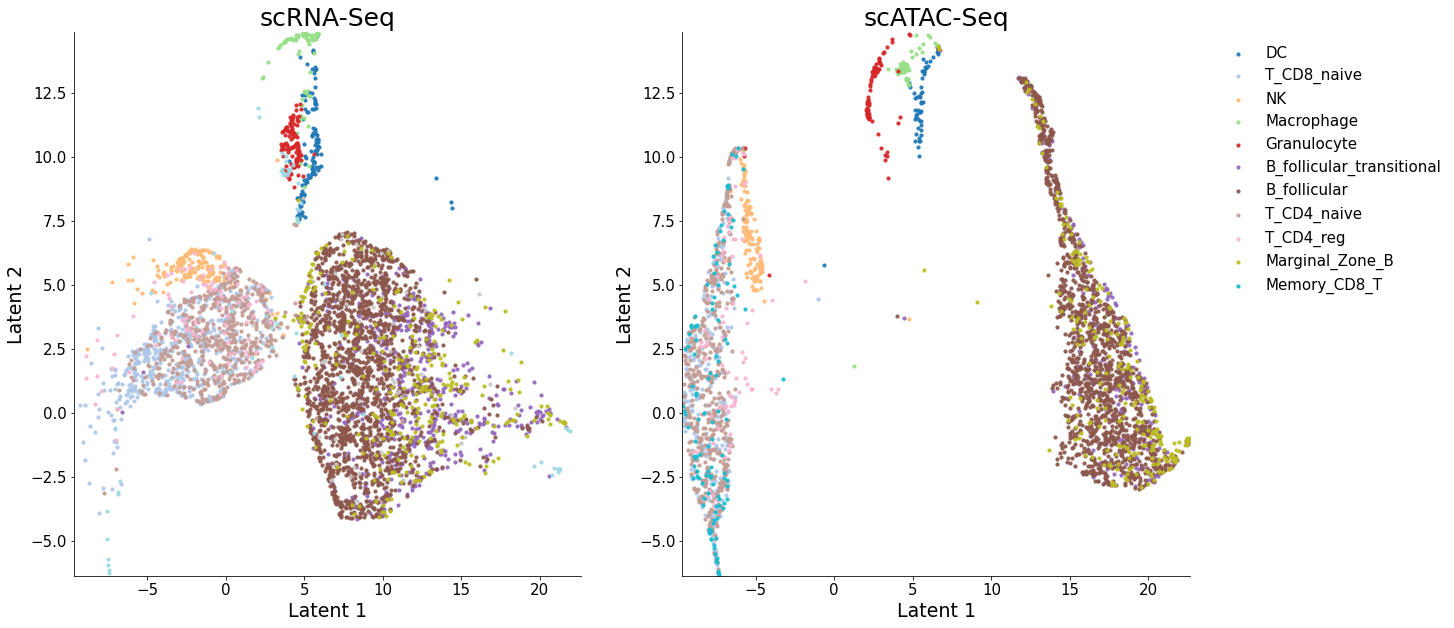

In [87]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach()).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join(dir, "meta_rna.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]
label_atac = pd.read_csv(os.path.join(dir, "meta_atac.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

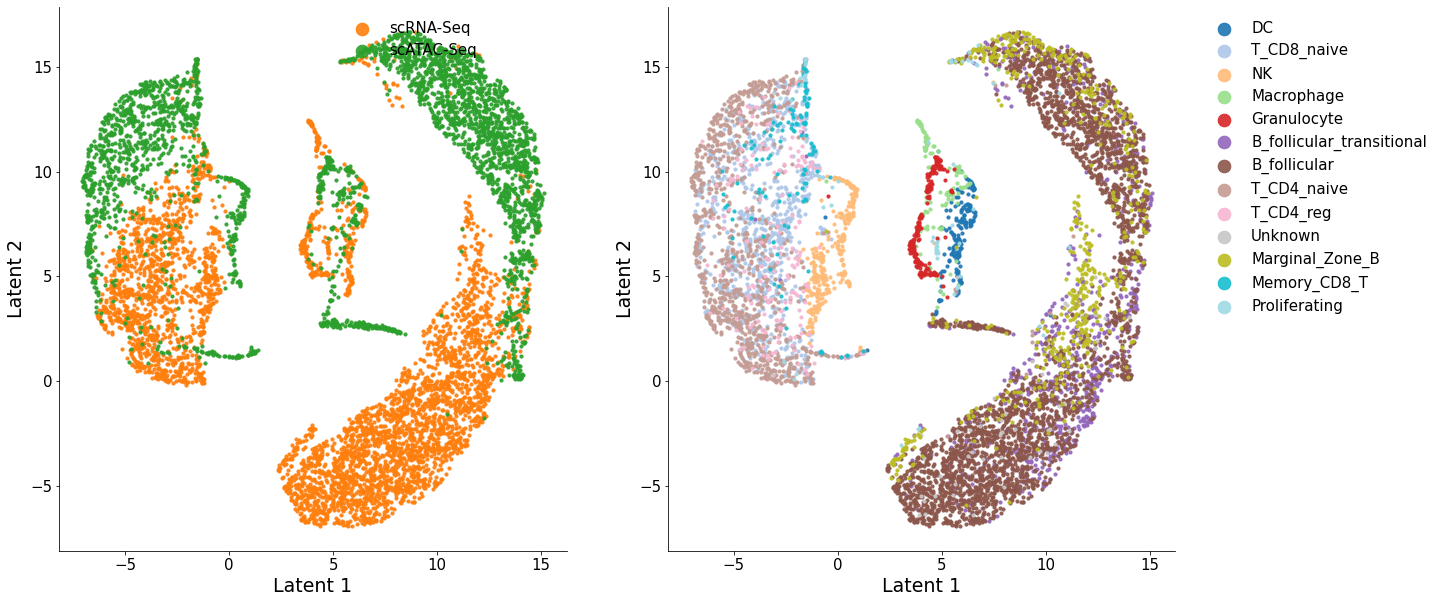

In [85]:
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "hybrid", save = None)

In [61]:
model_classic = model.classicCFRM(counts, N = 10, init = "svd")

0.08055009692907333
0.0086861252784729
0.07184699177742004
1.6977135601337068e-05


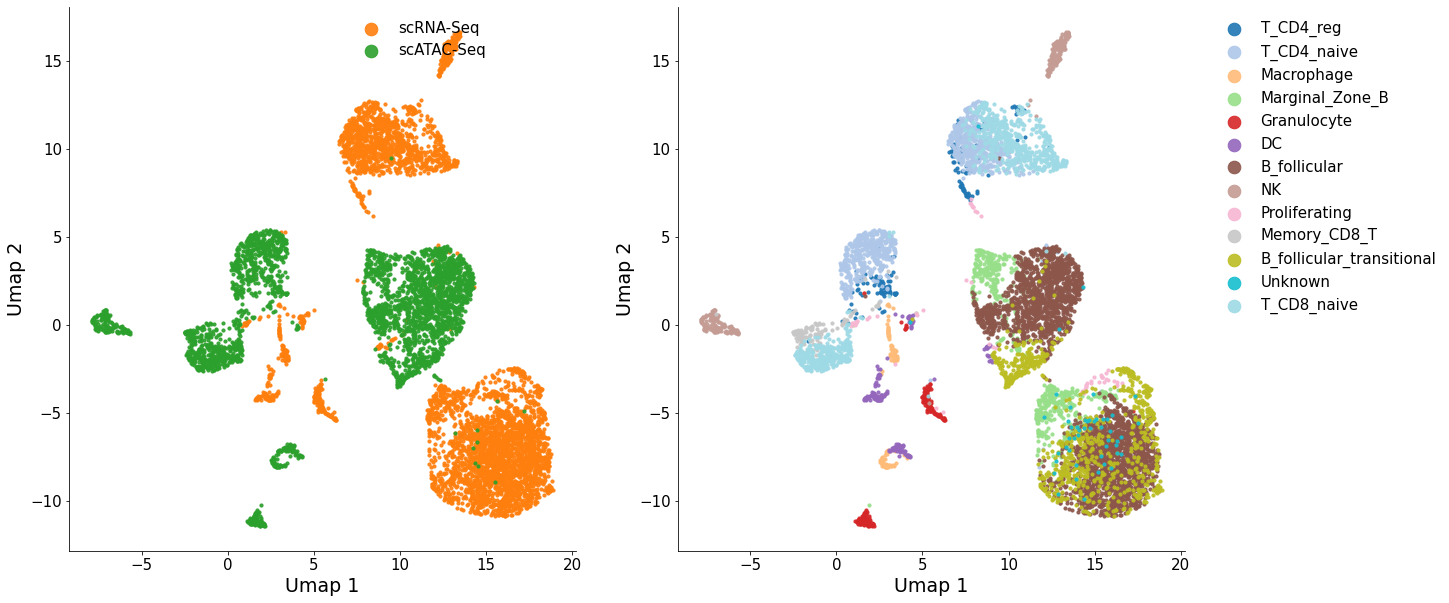

In [62]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model_classic.C_1.cpu().detach().numpy()
z_atac = model_classic.C_2.cpu().detach().numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join(dir, "meta_rna.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]
label_atac = pd.read_csv(os.path.join(dir, "meta_atac.csv"), index_col=0)["cell_type"].values.squeeze()[::subsample]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "hybrid", save = None, axis_label = "Umap")

In [39]:
u,s,v = np.linalg.svd(counts_rna, full_matrices = False)

np.cumsum( (s/np.sum(s)) )

array([0.11167257, 0.21572727, 0.25423892, ..., 0.99987578, 0.99993824,
       1.        ])

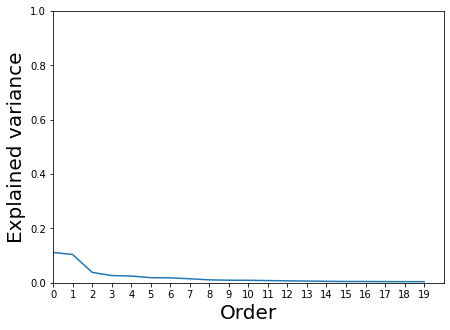

In [40]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot()
ax.plot((s/np.sum(s))[:20])
ax.set_ylim([0,1])
ax.set_xlim([0,20])
_ = ax.set_xticks(np.arange(20))
_ = ax.set_xlabel("Order", fontsize = 20)
_ = ax.set_ylabel("Explained variance", fontsize = 20)

In [104]:
# read in the real BMMC data

dir = '../data/real/BMMC/'
counts_rna = sp.load_npz(os.path.join(dir, 'C1xG.npz'))
counts_atac = sp.load_npz(os.path.join(dir, 'C2xR.npz')).astype(np.float32)
A = sp.load_npz(os.path.join(dir, 'GxR.npz'))
subsample = 3

counts_rna = np.array(counts_rna.todense())
counts_atac = np.array(counts_atac.todense())
counts_rna = counts_rna[::subsample,:]
counts_atac = counts_atac[::subsample,:]
A = np.array(A.todense())

counts = {"rna":[counts_rna], "atac": [counts_atac], "gact": [A]}

model1 = newmodel.cfrm_new(counts, N = 10, batch_size = 0.2, interval=100, lr=1e-3, 
                           alpha = [1000, 1000, 100, 100], seed = 0).to(device)

with torch.no_grad():
    loss, *_ = model1.batch_loss('valid')
    print('Initial Loss is {:.5f}'.format(loss.item()))

model1.train_func(T = 10000)
# model1.load_state_dict(torch.load('../check_points/real5.pt'))

Initial Loss is -157.47299
Epoch 100, Validating Loss: -165.6251
	 loss 1: 12.75383
	 loss 2: 19.16362
	 loss 3: -99.99977
	 loss 4: -97.54278
Epoch 200, Validating Loss: -166.7095
	 loss 1: 12.73977
	 loss 2: 19.15194
	 loss 3: -99.99998
	 loss 4: -98.60122
Epoch 300, Validating Loss: -167.3477
	 loss 1: 12.73205
	 loss 2: 19.14442
	 loss 3: -100.00000
	 loss 4: -99.22415
Epoch 400, Validating Loss: -167.7098
	 loss 1: 12.72783
	 loss 2: 19.13880
	 loss 3: -99.99998
	 loss 4: -99.57649
Epoch 500, Validating Loss: -167.9090
	 loss 1: 12.72482
	 loss 2: 19.13442
	 loss 3: -100.00000
	 loss 4: -99.76826
Epoch 600, Validating Loss: -168.0157
	 loss 1: 12.72323
	 loss 2: 19.13107
	 loss 3: -99.99997
	 loss 4: -99.87007
Epoch 700, Validating Loss: -168.0723
	 loss 1: 12.72210
	 loss 2: 19.12850
	 loss 3: -100.00000
	 loss 4: -99.92289
Epoch 800, Validating Loss: -168.1068
	 loss 1: 12.71921
	 loss 2: 19.12420
	 loss 3: -99.99998
	 loss 4: -99.95021
Epoch 900, Validating Loss: -168.1298
	 lo

Epoch 7100, Validating Loss: -169.2440
	 loss 1: 12.12735
	 loss 2: 18.48385
	 loss 3: -99.99988
	 loss 4: -99.85530
Epoch 7200, Validating Loss: -169.2449
	 loss 1: 12.12720
	 loss 2: 18.48267
	 loss 3: -99.99991
	 loss 4: -99.85483
Epoch 7300, Validating Loss: -169.2467
	 loss 1: 12.12596
	 loss 2: 18.48166
	 loss 3: -99.99991
	 loss 4: -99.85439
Epoch 7400, Validating Loss: -169.2483
	 loss 1: 12.12610
	 loss 2: 18.48107
	 loss 3: -99.99989
	 loss 4: -99.85555
Epoch 7500, Validating Loss: -169.2495
	 loss 1: 12.12556
	 loss 2: 18.47994
	 loss 3: -99.99992
	 loss 4: -99.85505
Epoch 7600, Validating Loss: -169.2508
	 loss 1: 12.12523
	 loss 2: 18.47885
	 loss 3: -99.99992
	 loss 4: -99.85501
Epoch 7700, Validating Loss: -169.2530
	 loss 1: 12.12501
	 loss 2: 18.47786
	 loss 3: -99.99989
	 loss 4: -99.85595
Epoch 7800, Validating Loss: -169.2535
	 loss 1: 12.12451
	 loss 2: 18.47740
	 loss 3: -99.99990
	 loss 4: -99.85549
Epoch 7900, Validating Loss: -169.2542
	 loss 1: 12.12346
	 loss

In [105]:
counts_atac.shape

(5392, 97440)

In [106]:
u,s,v = np.linalg.svd(counts_rna, full_matrices = False)

np.cumsum( (s/np.sum(s)) )

array([0.01852939, 0.02692913, 0.03186705, ..., 0.99998575, 0.999993  ,
       1.        ], dtype=float32)

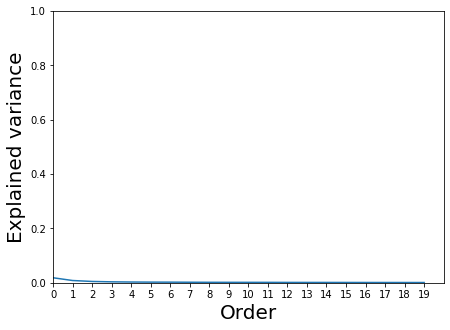

In [107]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot()
ax.plot((s/np.sum(s))[:20])
ax.set_ylim([0,1])
ax.set_xlim([0,20])
_ = ax.set_xticks(np.arange(20))
_ = ax.set_xlabel("Order", fontsize = 20)
_ = ax.set_ylabel("Explained variance", fontsize = 20)

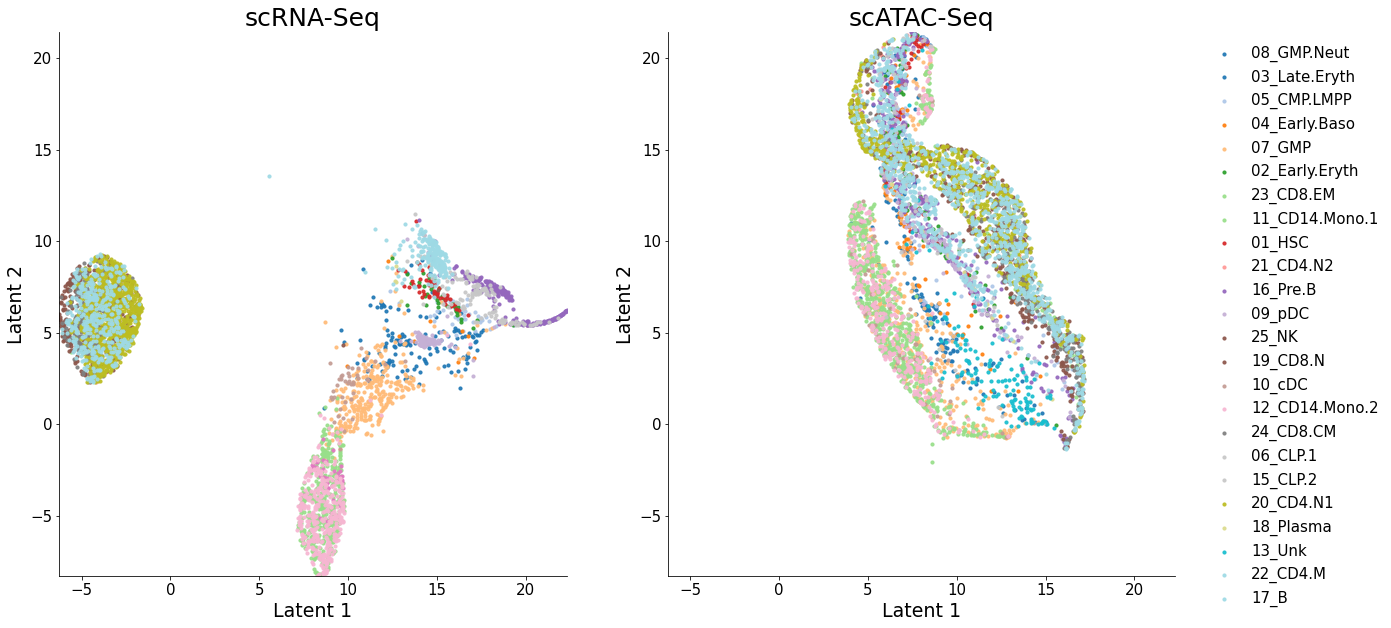

In [108]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach()).numpy()
z_atac = model1.softmax(model1.C_2.cpu().detach()).numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join('../data/real/BMMC/', "meta_rna.csv"), index_col=0)["cluster"].values.squeeze()[::subsample]
label_atac = pd.read_csv(os.path.join('../data/real/BMMC/', "meta_atac.csv"), index_col=0)["cluster"].values.squeeze()[::subsample]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

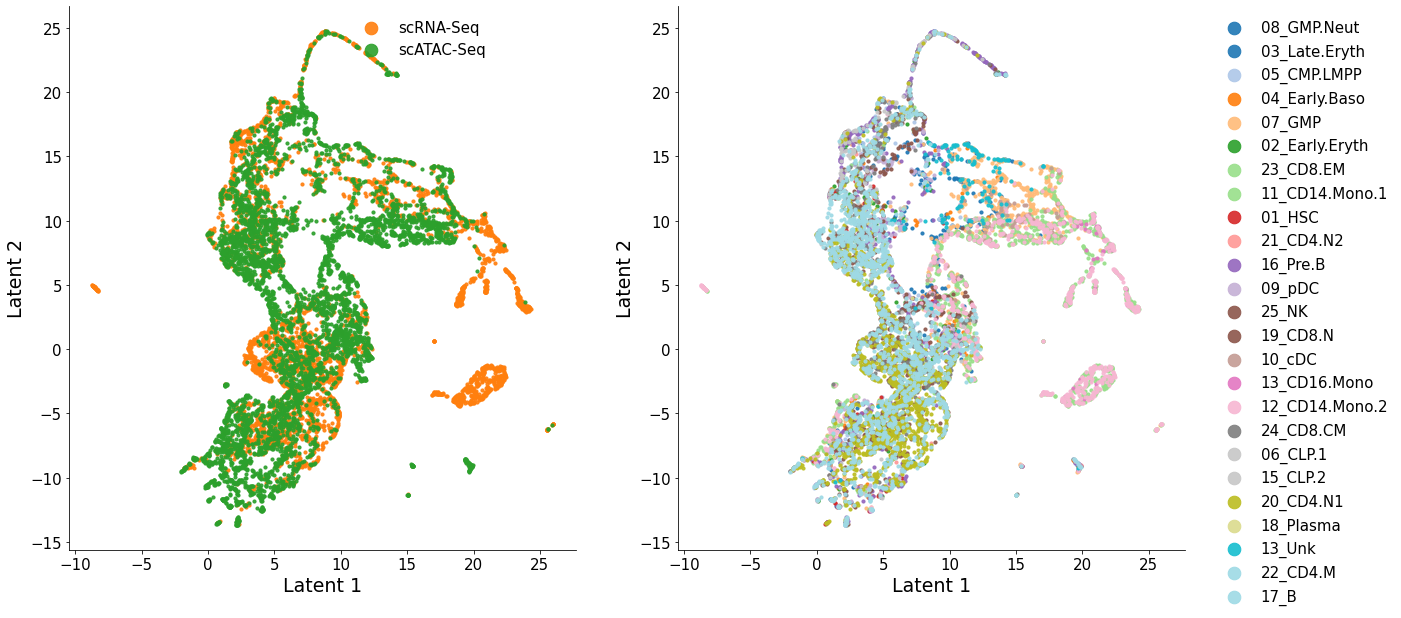

In [109]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model1.softmax(model1.C_1.cpu().detach())
z_atac = model1.softmax(model1.C_2.cpu().detach())
max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)

z_rna, z_atac = utils.match_alignment(z_rna, z_atac, k = 10)
z_atac, z_rna = utils.match_alignment(z_atac, z_rna, k = 10)


z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join('../data/real/BMMC/', "meta_rna.csv"), index_col=0)["cluster"].values.squeeze()[::subsample]
label_atac = pd.read_csv(os.path.join('../data/real/BMMC/', "meta_atac.csv"), index_col=0)["cluster"].values.squeeze()[::subsample]
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "hybrid", save = None)

In [ ]:
utils.plot_latent(z_rna, z_atac, max_rna, max_atac, mode= "separate", save = None)

In [98]:
model_classic = model.classicCFRM(counts, N = 10, init = "svd")

0.02966867946088314
0.011559577658772469
0.01810765452682972
1.4479809351541917e-06


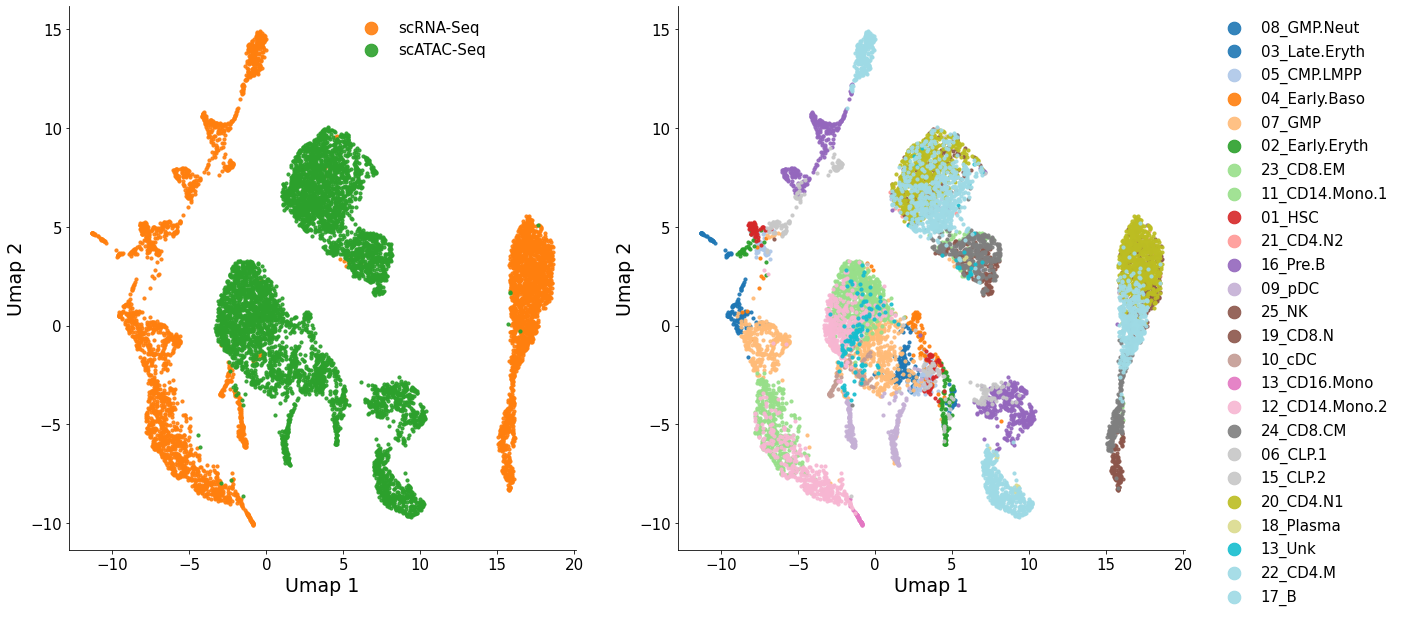

In [100]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 

z_rna = model_classic.C_1.cpu().detach().numpy()
z_atac = model_classic.C_2.cpu().detach().numpy()

max_rna = np.argmax(z_rna, axis = 1)
max_atac = np.argmax(z_atac, axis = 1)
z = umap_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = pd.read_csv(os.path.join('../data/real/BMMC/', "meta_rna.csv"), index_col=0)["cluster"].values.squeeze()[::subsample]
label_atac = pd.read_csv(os.path.join('../data/real/BMMC/', "meta_atac.csv"), index_col=0)["cluster"].values.squeeze()[::subsample]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "hybrid", save = None, axis_label = "Umap")

# OLD

In [51]:
class sc_cfrm(Module):
    def __init__(self, dir = "../data/simulated/2b3c_ziqi1/", N=3, batch_size=512, interval=10, lr=1e-3, init='svd'):
        super().__init__()
        self.N = N
        self.batch_size = batch_size
        self.interval = interval
        self.alpha = torch.FloatTensor([1000, 1000, 1, 1, 1]).to(device)
        # data
        counts_rna = pd.read_csv(dir + "GxC1.txt", sep = "\t", header = None).values.T
        counts_atac = pd.read_csv(dir + "RxC2.txt", sep = "\t", header = None).values.T
        gact = pd.read_csv(dir + "region2gene.txt", sep = "\t", header = None).values.T

        counts_rna = utils.preprocess(counts_rna, mode = "quantile", modality = "RNA")
        counts_atac = utils.preprocess(counts_atac, mode = "quantile", modality = "ATAC")
        gact = utils.preprocess(gact, mode = "gact")

        counts_rna = counts_rna/np.max(counts_rna)
        counts_atac = counts_atac/np.max(counts_atac)

        self.G = torch.FloatTensor(counts_rna).to(device)
        self.R = torch.FloatTensor(counts_atac).to(device)
        self.A = torch.FloatTensor(gact).to(device)

        self.Ar = Parameter(torch.randn((N,N)))
        self.Ag = Parameter(torch.randn((N,N)))
        # self.Ar = torch.eye(N,N)
        # self.Ag = torch.eye(N,N)

        self.C_1 = Parameter(torch.randn(self.G.shape[0], N))
        self.C_2 = Parameter(torch.randn(self.R.shape[0], N))
        
        # replace C_2 with P @ C_1, where P is a simplex pairing matrix, then C_2 is still simplex
        # self.P = Parameter(torch.randn(self.G.shape[0], self.R.shape[0]))
        
        # low rank decomp
        self.Pl = Parameter(torch.randn(self.G.shape[0], N))
        self.Pr = Parameter(torch.randn(N, self.R.shape[0]))
        
        self.C_g = Parameter(torch.randn(self.G.shape[1], N))
        self.C_r = Parameter(torch.randn(self.R.shape[1], N))
        
        self.s_g = torch.ones(1, self.G.shape[1]).to(device)
        self.s_r = torch.ones(1, self.R.shape[1]).to(device)

        self.b_g = Parameter(torch.zeros(1, self.G.shape[1]))
        self.b_r = Parameter(torch.zeros(1, self.R.shape[1]))
        # self.b_g = torch.zeros(1, self.G.shape[1]).to(device)
        # self.b_r = torch.zeros(1, self.R.shape[1]).to(device)

        self.meta_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), sep = "\t")
        self.meta_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), sep = "\t")
    
        self.optimizer = opt.Adam(self.parameters(), lr=lr)

        # with torch.no_grad():
        #     loss, *_ = self.batch_loss('valid')
        #     print('Initial Loss is {:.5f}'.format(loss.item()))

    @staticmethod
    def softmax(X: torch.Tensor):
        return torch.softmax(X, dim=1)
        # return X
        # return torch.exp(X)

    @staticmethod
    def entropy_loss(C):
        # loss = - F.softmax(C, dim=1) * F.log_softmax(C, dim=1)
        loss = - C * torch.log(C)
        return loss.sum(dim=1).mean()

    def batch_loss(self, mode):
        if mode != 'valid':
            mask_1 = np.random.choice(self.G.shape[0], self.batch_size, replace=False)
            mask_2 = np.random.choice(self.R.shape[0], self.batch_size, replace=False)
            mask_g = np.random.choice(self.G.shape[1], self.batch_size, replace=False)
            mask_r = np.random.choice(self.R.shape[1], self.batch_size, replace=False)
            
        if mode == 'C_12':

            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:].detach()) @ 
                     self.softmax(self.Pr[:,mask_2].detach()) @ self.softmax(self.C_2[mask_2,:]) @ 
                     self.Ag.detach() @ self.softmax(self.C_g[mask_g, :].detach()).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
            
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:]) @ 
                     self.Ar.detach() @ self.softmax(self.C_r[mask_r,:].detach()).t()) - 
                     self.b_r[:, mask_r]).pow(2).mean()
            
            loss3 = 0
            loss4 = 0 
            loss5 = 0
            
        elif mode == "P":
            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:]) @ 
                     self.softmax(self.Pr[:,mask_2]) @ self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ag.detach() @ self.softmax(self.C_g[mask_g, :].detach()).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
            
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ar.detach() @ self.softmax(self.C_r[mask_r,:].detach()).t()) - 
                     self.b_r[:, mask_r]).pow(2).mean()
            
            loss3 = 0
            loss4 = 0 
            loss5 = self.entropy_loss((self.softmax(self.Pl[mask_1,:]) @ self.softmax(self.Pr[:,mask_2])))
        
        elif mode == 'C_gr':
            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:].detach()) @ 
                     self.softmax(self.Pr[:,mask_2].detach()) @ self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ag.detach() @ self.softmax(self.C_g[mask_g, :]).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
    
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ar.detach() @ self.softmax(self.C_r[mask_r, :]).t()) - 
                     self.b_r[:, mask_r]).pow(2).mean()
            
            # correlation ver
            loss3 = - torch.trace((self.softmax(self.C_g[mask_g,:])/ torch.norm(self.softmax(self.C_g[mask_g,:]), dim = 0)[None,:]).t() @ 
                      self.A[np.ix_(mask_g, mask_r)] @ (self.softmax(self.C_r[mask_r,:])/torch.norm(self.softmax(self.C_r[mask_r,:]), dim = 0)[None,:]))
            
            loss4 = 0 
            loss5 = 0
        
        elif mode == "A":
            loss1 = (self.G[np.ix_(mask_1, mask_g)] - self.s_g[:, mask_g] *(self.softmax(self.Pl[mask_1,:].detach()) @ 
                     self.softmax(self.Pr[:,mask_2].detach()) @ self.softmax(self.C_2[mask_2,:].detach()) @ 
                     self.Ag @ self.softmax(self.C_g[mask_g, :].detach()).t()) - 
                     self.b_g[:, mask_g]).pow(2).mean()
            
            loss2 = (self.R[np.ix_(mask_2, mask_r)] - self.s_r[:, mask_r] *(self.softmax(self.C_2[mask_2,:].detach()) @ self.Ar @
                     self.softmax(self.C_r[mask_r, :].detach()).t()) - self.b_r[:, mask_r]).pow(2).mean()
            

            loss3 = 0
            loss4 = -torch.trace((self.Ar/torch.norm(self.Ar)).t() @ (self.Ag)/torch.norm(self.Ag))
            loss5 = 0
            
   
        elif mode == 'valid':
            with torch.no_grad():
                loss1 = (self.G - (self.softmax(self.Pl) @ self.softmax(self.Pr) @ 
                         self.softmax(self.C_2) @ self.Ag @
                         self.softmax(self.C_g).t()) - self.b_g).pow(2).mean()
                
                loss2 = (self.R - (self.softmax(self.C_2) @ self.Ar @
                         self.softmax(self.C_r).t()) - self.b_r).pow(2).mean()
                
                # maximize the correlationship
                loss3 = - torch.trace((self.softmax(self.C_g) / torch.norm(self.softmax(self.C_g), dim = 0)[None,:]).t() @ 
                                      self.A @ (self.softmax(self.C_r) / torch.norm(self.softmax(self.C_r), dim = 0)[None,:]))
                
                loss4 = -torch.trace((self.Ar/torch.norm(self.Ar)).t() @ (self.Ag)/torch.norm(self.Ag))
                loss5 = self.entropy_loss((self.softmax(self.Pl) @ self.softmax(self.Pr)))
        else:
            raise NotImplementedError
        loss = self.alpha[0] * loss1 + self.alpha[1] * loss2 + self.alpha[2] * loss3 + self.alpha[3] * loss4 + self.alpha[4] * loss5
               
        return loss, self.alpha[0] * loss1, self.alpha[1] * loss2, self.alpha[2] * loss3, self.alpha[3] * loss4, self.alpha[4] * loss5
    #
    def train_func(self, T):
        best_loss = 1e12
        count = 0
        for t in range(T):
            loss = 0
            for it in range(500):
                mode = 'C_12'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    
            loss = 0
            for it in range(500):
                mode = 'P'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    
            
            loss = 0
            for it in range(500):
                mode = 'C_gr'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    


            for it in range(500):
                mode = 'A'
                self.optimizer.zero_grad()
                loss_pre = loss
                loss, *_ = self.batch_loss(mode)
                loss.backward()
                self.optimizer.step()
                if torch.abs(loss_pre - loss) < 1e-3:
                    print(it)
                    break
                    
                
            if (t+1) % self.interval == 0:
                loss, loss1, loss2, loss3, loss4, loss5 = self.batch_loss('valid')
                print('Epoch {}, Validating Loss: {:.4f}'.format(t + 1, loss.item()))
                info = [
                    'loss 1: {:.5f}'.format(loss1.item()),
                    'loss 2: {:.5f}'.format(loss2.item()),
                    'loss 3: {:.5f}'.format(loss3.item()),
                    'loss 4: {:.5f}'.format(loss4.item()),
                    'loss 5: {:.5f}'.format(loss5.item())
                ]
                for i in info:
                    print("\t", i)
                if loss.item() < best_loss:
                    best_loss = loss.item()
                    torch.save(self.state_dict(), f'../check_points/real_{self.N}.pt')
                    count = 0
                else:
                    count += 1
                    if count % 20 == 0:
                        self.optimizer.param_groups[0]['lr'] *= 0.5
                        print('Epoch: {}, shrink lr to {:.4f}'.format(t + 1, self.optimizer.param_groups[0]['lr']))
                        if self.optimizer.param_groups[0]['lr'] < 1e-4:
                            break
                        else:
                            self.load_state_dict(torch.load(f'../check_points/real_{self.N}.pt'))
                            count = 0



None


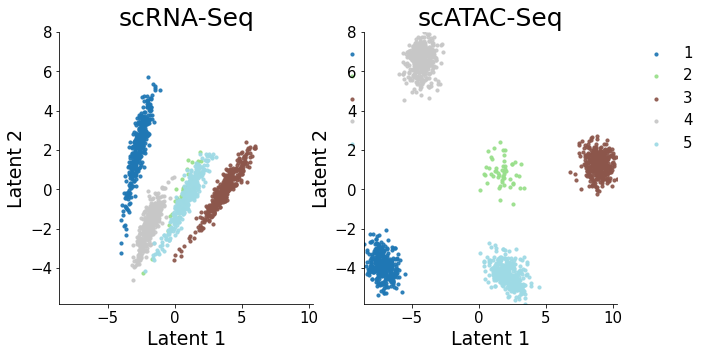

In [10]:
pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = pca_op.fit_transform(model.G.detach().numpy())
z_atac = pca_op.fit_transform(model.R.detach().numpy())

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None, figsize = (10,5))

None


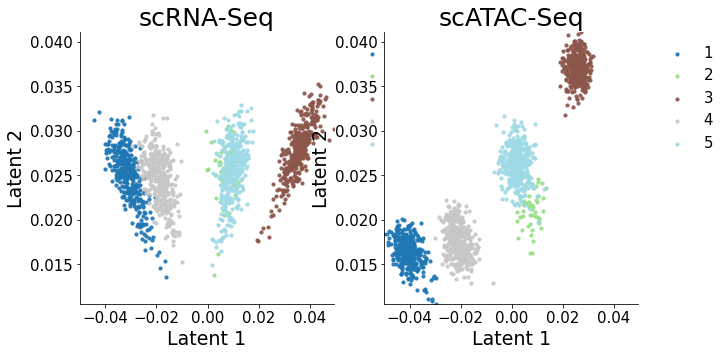

In [13]:
label_rna = model.meta_rna["pop"].values[:,None]
label_atac = model.meta_atac["pop"].values[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None, figsize = (10,5))

In [45]:
model = cfrmModel(dir = '../data/simulated/2b5c_ziqi1/', N=3, batch_size = 512, init = "svd")
model.train_func(T=100)

0.39255449175834656
0.3472805917263031
0.0450749546289444
0.000198934183572419
Epoch 1, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 2, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 3, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 4, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 5, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 6, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 7, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 8, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 9, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 10, Training Loss: 0.3926
	 loss RNA: 0.34

Epoch 84, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 85, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 86, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020
Epoch 87, Training Loss: 0.3926
	 loss RNA: 0.34728
	 loss ATAC: 0.04507
	 loss gene act: 0.00020


KeyboardInterrupt: 

In [46]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

In [50]:
dir = '../data/simulated/2b5c_ziqi1/'
meta_rna = pd.read_csv(os.path.join(dir, "cell_label1.txt"), sep = "\t")
meta_atac = pd.read_csv(os.path.join(dir, "cell_label2.txt"), sep = "\t")
label_rna = meta_rna["pop"].values[:,None]
label_atac = meta_atac["pop"].values[:,None]

None


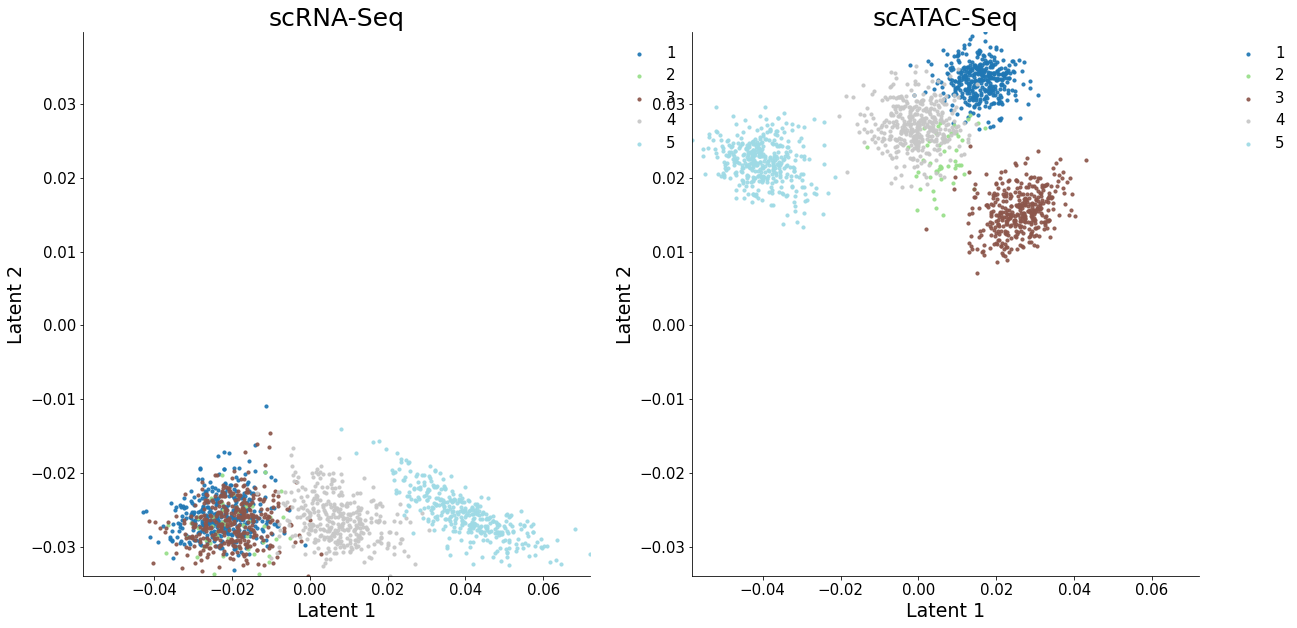

In [51]:
utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [27]:
model = cfrmModel(dir = '../data/simulated/2batches_3clusts', N=3, dropout=0, init = "svd")
model.train_func(T=1000)

0.2704484164714813
0.2241944968700409
0.04583536460995674
0.0004185508587397635
Epoch 1, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 2, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 3, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 4, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042
Epoch 5, Training Loss: 0.2704
	 loss RNA: 0.22419
	 loss ATAC: 0.04584
	 loss gene act: 0.00042


KeyboardInterrupt: 

None


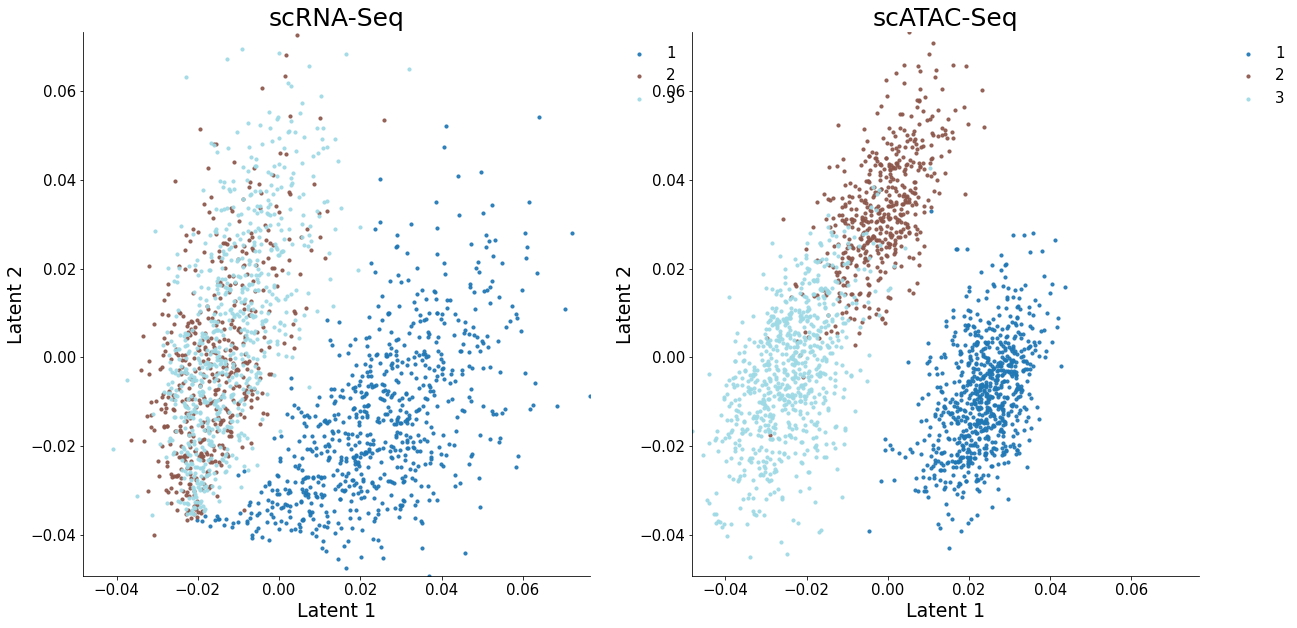

In [28]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = [x for x in model.label_c1.numpy()]
label_atac = [x for x in model.label_c2.numpy()]
label_rna = model.label_c1.numpy()[:,None]
label_atac = model.label_c2.numpy()[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [29]:
model = cfrmModel(dir = '../data/simulated/2batches_6clusts', N=3, dropout=0, init = "random")
model.train_func(T=100)

1.1414905786514282
1.0413411855697632
0.09973078221082687
0.0004186659352853894
Epoch 1, Training Loss: 0.3652
	 loss RNA: 0.28159
	 loss ATAC: 0.08321
	 loss gene act: 0.00042
Epoch 2, Training Loss: 0.2638
	 loss RNA: 0.21496
	 loss ATAC: 0.04846
	 loss gene act: 0.00042
Epoch 3, Training Loss: 0.2599
	 loss RNA: 0.21157
	 loss ATAC: 0.04789
	 loss gene act: 0.00042
Epoch 4, Training Loss: 0.2596
	 loss RNA: 0.21145
	 loss ATAC: 0.04776
	 loss gene act: 0.00042
Epoch 5, Training Loss: 0.2596
	 loss RNA: 0.21144
	 loss ATAC: 0.04771
	 loss gene act: 0.00042
Epoch 6, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04767
	 loss gene act: 0.00042
Epoch 7, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04764
	 loss gene act: 0.00042
Epoch 8, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04763
	 loss gene act: 0.00042
Epoch 9, Training Loss: 0.2595
	 loss RNA: 0.21144
	 loss ATAC: 0.04761
	 loss gene act: 0.00042
Epoch 10, Training Loss: 0.2595
	 loss RNA: 0.2

KeyboardInterrupt: 

None


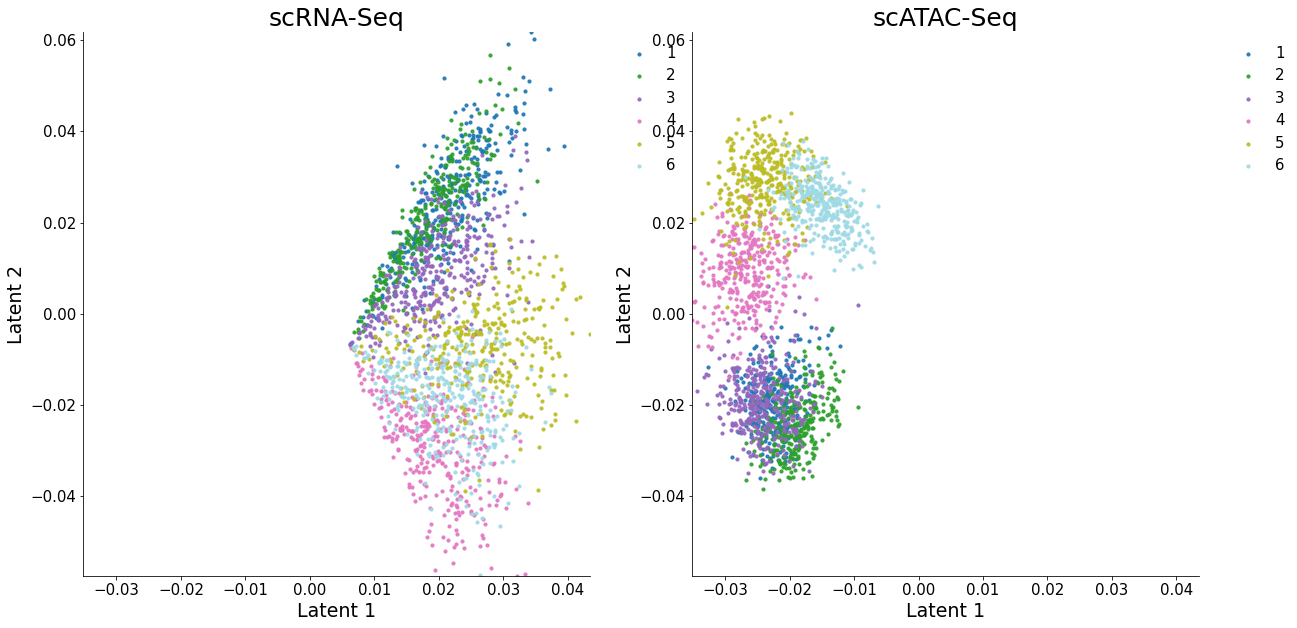

In [30]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = [x for x in model.label_c1.numpy()]
label_atac = [x for x in model.label_c2.numpy()]
label_rna = model.label_c1.numpy()[:,None]
label_atac = model.label_c2.numpy()[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)

In [31]:
model = cfrmModel(dir = '../data/simulated/2batches_6clusts', N=3, dropout=0, init = "svd")
model.train_func(T=100)

0.25944381952285767
0.21143664419651031
0.04758860915899277
0.0004185651778243482
Epoch 1, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 2, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 3, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 4, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 5, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042
Epoch 6, Training Loss: 0.2594
	 loss RNA: 0.21144
	 loss ATAC: 0.04759
	 loss gene act: 0.00042


KeyboardInterrupt: 

None


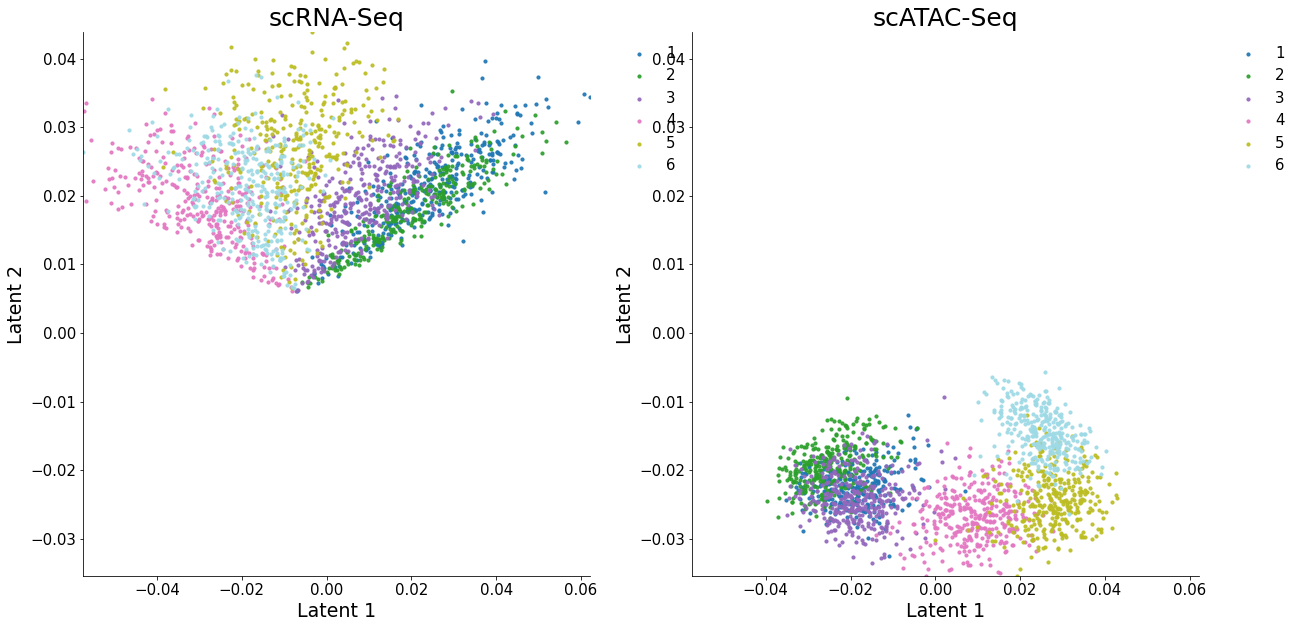

In [32]:
# torch.save(model, "b2c6.pth")
# model = torch.load("b2c6.pth")
from umap import UMAP

pca_op = PCA(n_components = 2)
umap_op = UMAP(n_components = 2, n_neighbors = 15, min_dist = 0.4) 
z_rna = model.C_1.detach().numpy()
z_atac = model.C_2.detach().numpy()
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna = z[:z_rna.shape[0],:]
z_atac = z[z_rna.shape[0]:,:]

label_rna = [x for x in model.label_c1.numpy()]
label_atac = [x for x in model.label_c2.numpy()]
label_rna = model.label_c1.numpy()[:,None]
label_atac = model.label_c2.numpy()[:,None]

utils.plot_latent(z_rna, z_atac, label_rna, label_atac, mode= "separate", save = None)